<a href="https://colab.research.google.com/github/edmenciab733/clases/blob/main/clasificacion_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Exploratorio

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


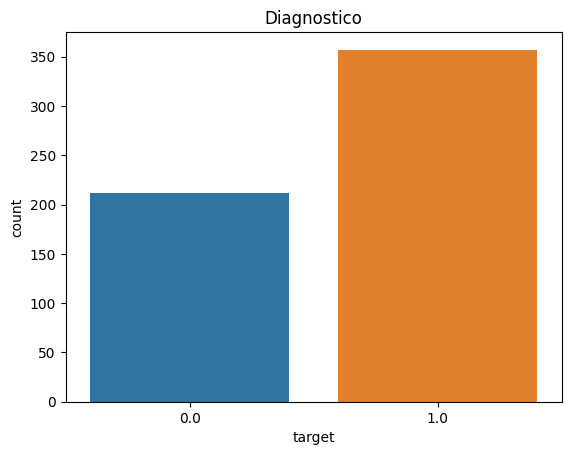

In [5]:
sns.countplot(x='target', data=df)
plt.title('Diagnostico')
plt.show()

In [6]:
X = df.drop(['target'],axis=1)
Y = df['target']

In [11]:
X.shape, Y.shape

((569, 30), (569,))

# PCA o Analisis de componentes principales

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=20, stratify=Y)

[9.82044672e+01 1.61764899e+00 1.55751075e-01 1.20931964e-02
 8.82724536e-03 6.64883951e-04 4.01713682e-04 8.22017197e-05
 3.44135279e-05 1.86018721e-05 6.99473205e-06 1.65908880e-06
 6.99641650e-07 4.78318306e-07 2.93549214e-07 1.41684927e-07
 8.29577731e-08 5.20405883e-08 4.08463983e-08 3.63313378e-08
 1.72849737e-08 1.27487508e-08 7.72682973e-09 6.28357718e-09
 3.57302295e-09 2.76396041e-09 8.14452259e-10 6.30211541e-10
 4.43666945e-10 1.55344680e-10]
[ 98.20446715  99.82211614  99.97786721  99.98996041  99.99878765
  99.99945254  99.99985425  99.99993645  99.99997087  99.99998947
  99.99999646  99.99999812  99.99999882  99.9999993   99.99999959
  99.99999974  99.99999982  99.99999987  99.99999991  99.99999995
  99.99999996  99.99999998  99.99999999  99.99999999 100.
 100.         100.         100.         100.         100.        ]


Text(0, 0.5, 'Varianza explicada Acumulada')

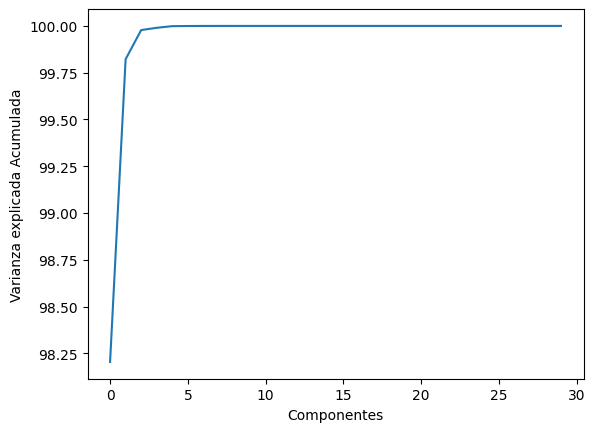

In [71]:
pca = PCA()
pca.fit(X)
X = pca.transform(X)
print(pca.explained_variance_ratio_ * 100)
print(pca.explained_variance_ratio_.cumsum() *100)
plt.plot(np.cumsum(pca.explained_variance_ratio_)  *100 )
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada Acumulada')

## SVM con **PCA**

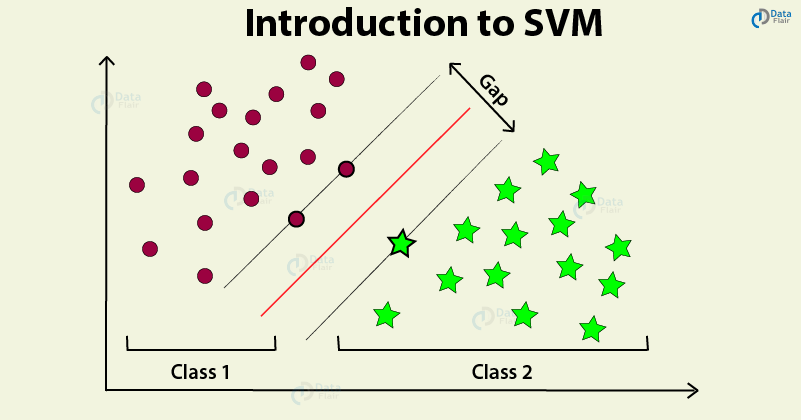

In [62]:
def modelo(X, Y):
  X_train, X_test, y_train,  y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
  clasificador = SVC()
  clasificador.fit(X_train ,y_train)
  Y_pred = clasificador.predict(X_test)
  cm = confusion_matrix(y_test, Y_pred)
  print(classification_report(y_test, Y_pred))
  import seaborn as sns
  sns.heatmap(cm, square=True, annot=True, cbar=False)
  plt.xlabel('predicted value')
  plt.ylabel('true value');

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87        71
         1.0       0.89      0.97      0.93       117

    accuracy                           0.91       188
   macro avg       0.92      0.89      0.90       188
weighted avg       0.91      0.91      0.91       188



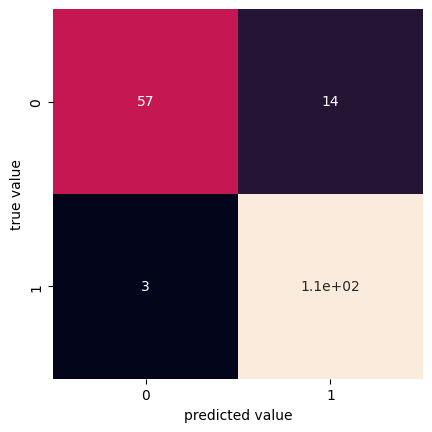

In [63]:
pca = PCA(n_components=1)
iris_pca = pca.fit_transform(X)
modelo(iris_pca, Y)

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89        71
         1.0       0.91      0.97      0.94       117

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



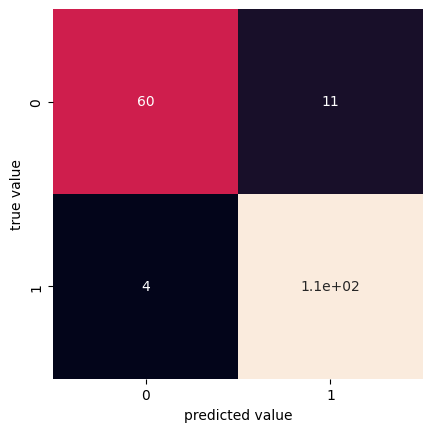

In [65]:
pca = PCA(n_components=3)
iris_pca = pca.fit_transform(X)
modelo(iris_pca, Y)

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89        71
         1.0       0.91      0.97      0.94       117

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



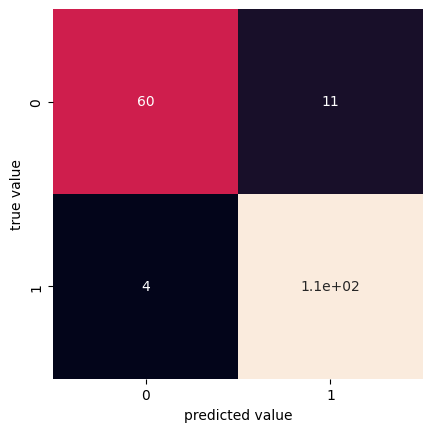

In [66]:
pca = PCA()
iris_pca = pca.fit_transform(X)
modelo(iris_pca, Y)

## Otros clasificadores

In [72]:
from sklearn.tree import DecisionTreeClassifier

def modelo_2(X, Y):
  X_train, X_test, y_train,  y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
  clasificador = DecisionTreeClassifier()
  clasificador.fit(X_train ,y_train)
  Y_pred = clasificador.predict(X_test)
  cm = confusion_matrix(y_test, Y_pred)
  print(classification_report(y_test, Y_pred))
  import seaborn as sns
  sns.heatmap(cm, square=True, annot=True, cbar=False)
  plt.xlabel('predicted value')
  plt.ylabel('true value');

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        71
         1.0       0.92      0.92      0.92       117

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188



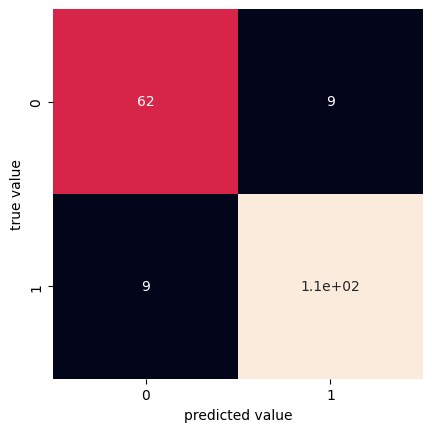

In [73]:
pca = PCA()
iris_pca = pca.fit_transform(X)
modelo_2(iris_pca, Y)